# Pre-Lab ELN

### Name: Osagie Aimiuwu


### Date: November 1, 2021


### PID: 730393691


### Jupyter Notebook Number: 2

## Purpose/Objective:
1. Correct an error in my original loud/quiet scenes list
2. Explore available data for experiments with natural scenes

### Installing AllenSDK into your local environment. 

In [1]:
pip install --user allensdk

Note: you may need to restart the kernel to use updated packages.


### Starting Code:

In [3]:
import os
import shutil
import allensdk #add to template
import pprint

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

# You may have to change the following code depending on whether you are working with EcephysProjectCache or BrainObservatoryCache. 
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [4]:
data_directory = 'allen_files' 

manifest_path = os.path.join(data_directory, "manifest.json")
boc = BrainObservatoryCache(manifest_file = manifest_path)

In [4]:
loud_scenes = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 28, 30, 33, 35, 37, 39, 
               40, 45, 46, 47, 48, 51, 54, 57, 58, 80]
quiet_scenes = [4, 19, 20, 21, 22, 25, 26, 27, 29, 31, 32, 34, 36, 38, 41, 42, 43, 44, 49, 50, 52, 53, 55, 
                56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 
                82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
                104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]

### Fixing an error in my lists

I forgot that indexing in python starts at 0, not 1, so the first and last natural scenes should correspond with 0 and 117, respectively. I use a for loop to correct this.

In [5]:
for i in range(len(loud_scenes)):
    loud_scenes[i] -= 1
for i in range(len(quiet_scenes)):
    quiet_scenes[i] -= 1
print(loud_scenes)
print(quiet_scenes)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 27, 29, 32, 34, 36, 38, 39, 44, 45, 46, 47, 50, 53, 56, 57, 79]
[3, 18, 19, 20, 21, 24, 25, 26, 28, 30, 31, 33, 35, 37, 40, 41, 42, 43, 48, 49, 51, 52, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


In [6]:
#New lists:
loud_scenes = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 27, 29, 32, 34, 36, 38, 39, 44, 45, 46, 47,
               50, 53, 56, 57, 79]
quiet_scenes = [3, 18, 19, 20, 21, 24, 25, 26, 28, 30, 31, 33, 35, 37, 40, 41, 42, 43, 48, 49, 51, 52, 54, 55, 58, 59, 60,
                61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88,
                89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
                113, 114, 115, 116, 117]

In [29]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))

scene_cells = cells[ cells['peak_dff_ns'] == cells['peak_dff_ns'] ]
print("cells with dff response to natural scene: %d" % len(scene_cells))

total cells: 63251
cells with dff response to natural scene: 40064


In [68]:
print(cells.columns)
print(scene_cells['peak_dff_ns'])

Index(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg',
       'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg',
       'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns',
       'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg',
       'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg',
       'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a',
       'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2',
       'reliability_nm3', 'reliability_ns', 'reliability_sg',
       'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn',
       'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn',
       'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg',
       'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg',
       'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1

In [45]:
scene_ec_ids = scene_cells['experiment_container_id'].unique()
print("total scene experiment containers: %d" % len(scene_ec_ids))

scene_exps = boc.get_ophys_experiments(experiment_container_ids=scene_ec_ids, stimuli=['natural_scenes'])
print("Scene ophys experiments: %d" % len(scene_exps))


total scene experiment containers: 456
Scene ophys experiments: 456
{'acquisition_age_days': 125,
 'cre_line': 'Scnn1a-Tg3-Cre',
 'donor_name': '246775',
 'experiment_container_id': 531134088,
 'fail_eye_tracking': False,
 'id': 531342486,
 'imaging_depth': 335,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'session_type': 'three_session_B',
 'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-246775',
 'targeted_structure': 'VISp'}


In [63]:
scene_cell = scene_cells.iloc[0]

cell_exp = boc.get_ophys_experiments(cell_specimen_ids=[scene_cell['cell_specimen_id']],
                                     stimuli=['natural_scenes'])[0]

data_set = boc.get_ophys_experiment_data(cell_exp['id'])

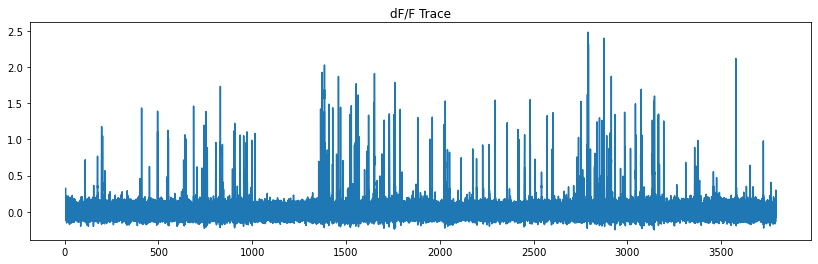

In [59]:
time, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[scene_cell['cell_specimen_id']])

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
# warning: dF/F can occasionally be one element longer or shorter 
# than the time stamps for the original traces.
plt.plot(time[:len(dff_traces[0])], dff_traces[0])
plt.show()

In [50]:
exps = boc.get_ophys_experiments(stimuli=['natural_scenes'])

male_exp_ids = []
female_exp_ids = []

for i in range(len(exps)):
    exp = exps[i]
    exp_id = exp['id']
    exp_data = boc.get_ophys_experiment_data(exp_id)
    
    if(exp_data.get_metadata()['sex'] == 'male'):
        male_exp_ids.append(exp_id)
    else:
        female_exp_ids.append(exp_id)

OSError: Unable to open file (truncated file: eof = 257240064, sblock->base_addr = 0, stored_eof = 469803439)

In [45]:
print(male_exp_ids)
print(female_exp_ids)

[503772253, 662960692, 593887846, 598905882, 501794235, 603516552, 590109296, 664414452, 614535829, 507304910, 660510504]
[663488086, 570006683, 511458599, 691201201, 717214654, 617395439]


In [ ]:
male_exp_ids = [503772253, 662960692, 593887846, 598905882, 501794235, 603516552, 590109296, 664414452, 614535829, 507304910, 660510504]
female_exp_ids = [663488086, 570006683, 511458599, 691201201, 717214654, 617395439]

List of precomputed cell metrics: https://alleninstitute.github.io/AllenSDK/brain_observatory.html
boc methods/parameters: https://alleninstitute.github.io/AllenSDK/allensdk.core.brain_observatory_cache.html